## Web Scraping des prix des Téléviseurs 32 Pouces sur le site de Amazon

### Fonction d'automatisation du scraping et import des données en csv

In [ ]:
# -*- coding: utf-8 -*-
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

urls = ["https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&crid=3OQLIZ6ARHSIX&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C180&ref=nb_sb_noss",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=2&crid=3PTU10YRD7ZKT&qid=1713382078&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_2",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=3&crid=3PTU10YRD7ZKT&qid=1713385807&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_3",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=4&crid=3PTU10YRD7ZKT&qid=1713385845&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_4",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=5&crid=3PTU10YRD7ZKT&qid=1713385868&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_5",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=5&crid=3PTU10YRD7ZKT&qid=1713385868&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_5",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=6&crid=3PTU10YRD7ZKT&qid=1713385903&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_6",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=7&crid=3PTU10YRD7ZKT&qid=1713386027&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_7",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=8&crid=3PTU10YRD7ZKT&qid=1713386037&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_8",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=9&crid=3PTU10YRD7ZKT&qid=1713386054&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_9",
        "https://www.amazon.com/s?k=T%C3%A9l%C3%A9vision+32+pouces&page=10&crid=3PTU10YRD7ZKT&qid=1713386119&sprefix=t%C3%A9l%C3%A9vision+32+pouces%2Caps%2C192&ref=sr_pg_10"]

def amazonscraper(urls): 
    name_list = list()
    price_list=list()
    for url in urls:
        headers = {'User-Agent': '', 'Accept-Language': 'en-US, en;q=0.5'}
        link = url
        response = requests.get(link, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        products = soup.find_all('div',{'class': 's-result-item'})
        for product in products:
            name_elem = product.find('h2',{'class':'a-size-mini'})
            print(name_elem)
            name = name_elem.text.strip() if name_elem is not None else 'nan'
            
            price_elem = product.find('span',{'class': 'a-price-whole'})
            price = price_elem.text.strip() if price_elem is not None else 'nan'
            
            name=name.split(",")
            name=name[0].replace('"','')
            
            name_list.append(name)
            price_list.append(price)
            
    product_data = {'Name':name_list,'Price':price_list}
    df= pd.DataFrame(product_data)
    df=df[df['Name']!="nan"]
    df=df[df['Price']!="nan"] 
    df.to_csv("Television_price.csv", index=False)
    
amazonscraper(urls)

### Comparaison des prix des télés

In [6]:
df= pd.read_csv("Television_price.csv")

# Prétraitement des données
df['Price']=df['Price'].str.replace(".","")
df['Price']=df['Price'].str.replace(",",".")
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  
df['Price'].astype(float)
df.drop_duplicates()
df1=df[df["Price"] > 50 ]


#### Les 5 télévisions les moins chères

C:\Users\Admin\AppData\Local\Temp\ipykernel_17520\2642553012.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


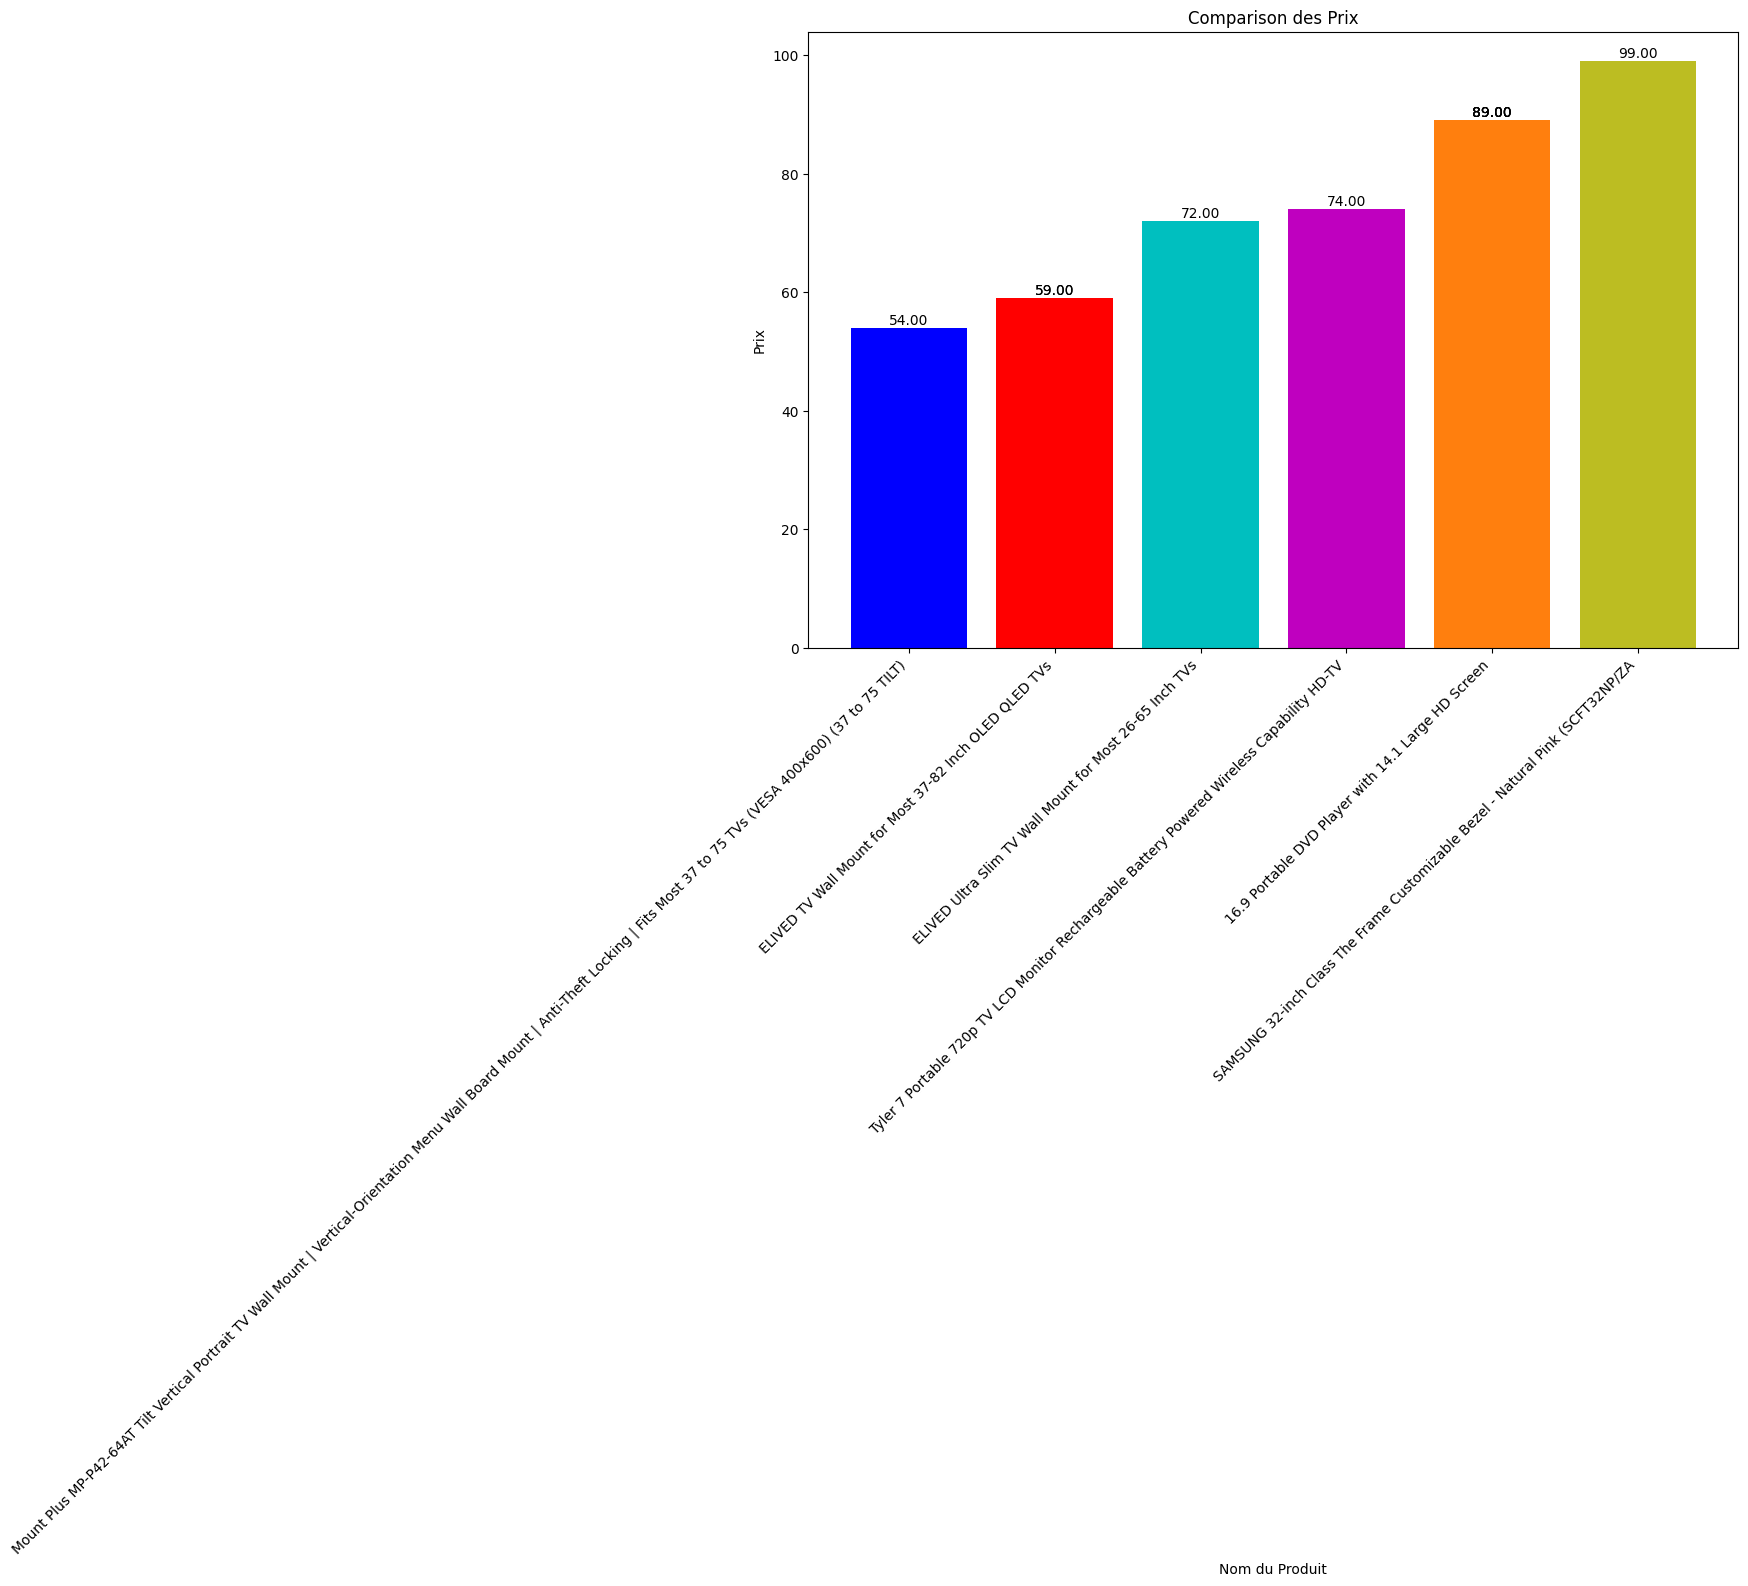

In [7]:

df2 = df1.sort_values(by="Price", ascending=True).head(10)
df_sorted=df2.head(10)


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:orange', 'tab:olive']

plt.figure(figsize=(12, 8)) 
bars = plt.bar(df_sorted['Name'], df_sorted['Price'], color=colors)  

for bar, price in zip(bars, df2['Price']):
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{price:.2f}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Nom du Produit')
plt.ylabel('Prix')
plt.title('Comparison des Prix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


#### Les 5 télévisions les plus chères

C:\Users\Admin\AppData\Local\Temp\ipykernel_17520\238764804.py:22: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_17520\238764804.py:22: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_17520\238764804.py:22: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_17520\238764804.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Pyt

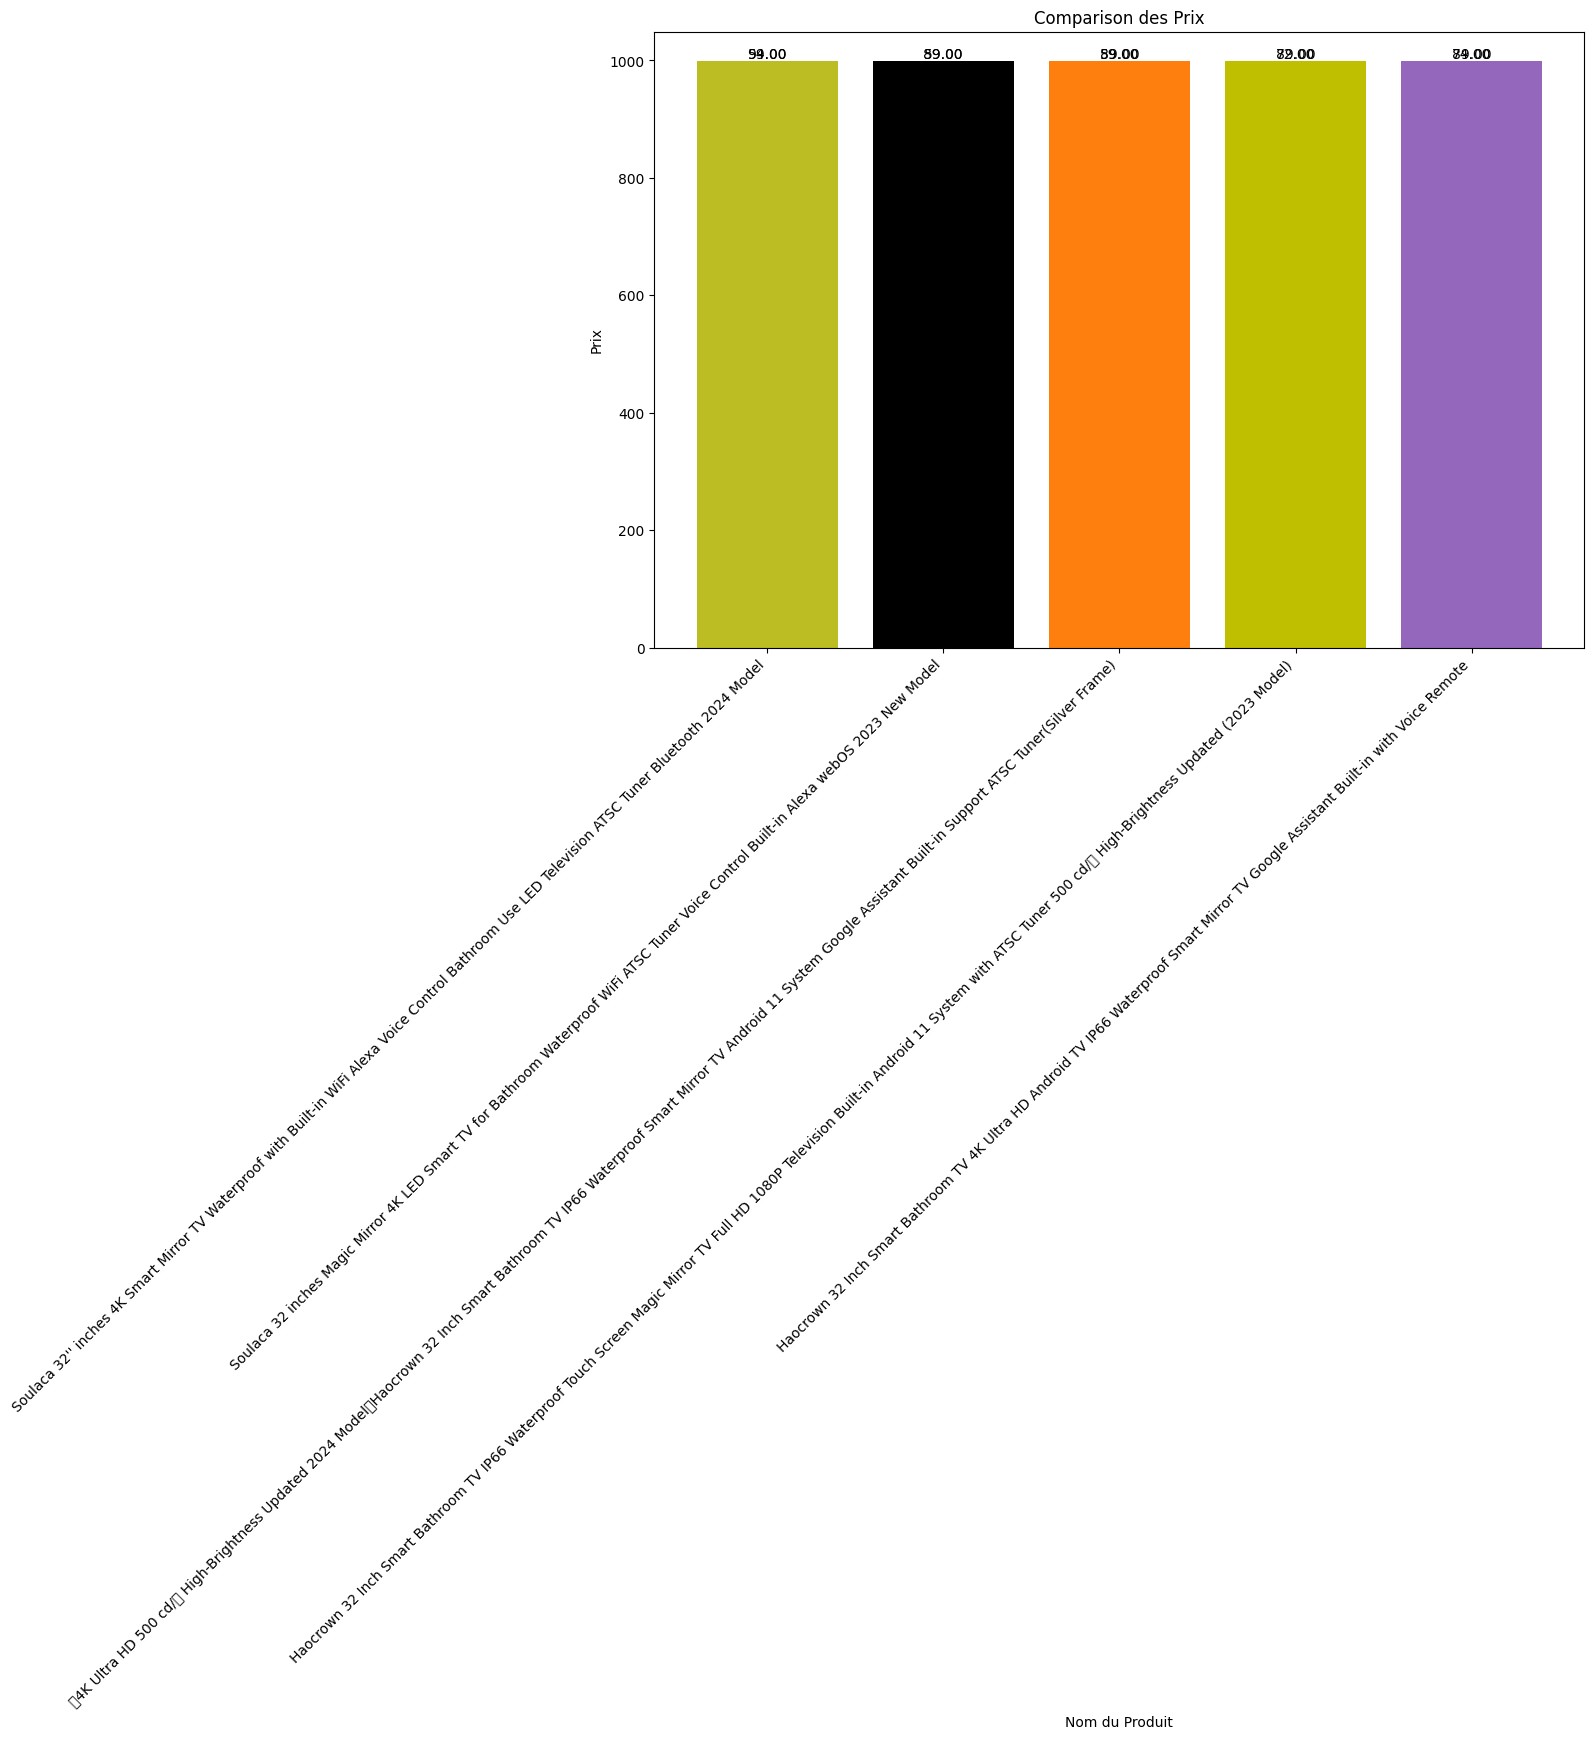

In [8]:


import pandas as pd
import matplotlib.pyplot as plt


df3 = df1.sort_values(by="Price", ascending=False).head(10)
df_sorted2=df3.head(10)


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:orange', 'tab:olive']

plt.figure(figsize=(12, 8))  
bars = plt.bar(df_sorted2['Name'], df_sorted2['Price'], color=colors)  

for bar, price in zip(bars, df2['Price']):
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{price:.2f}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Nom du Produit')
plt.ylabel('Prix')
plt.title('Comparison des Prix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
